In [39]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set the style for seaborn
perf_dir = 'perf/'
pkl_dir = 'pkl/'
mscales = [0, 1, 1e1, 1e2, 1e3, 1e4]

In [40]:
# with m scale = 100
mscale = 1e2
lqe_qkf_results_all = pickle.load(open(os.path.join(pkl_dir, f'lqe_qkf_results-mscale={int(mscale)}.pkl'), 'rb'))
ekf_results_all = pickle.load(open(os.path.join(pkl_dir, f'ekf_results-mscale={int(mscale)}.pkl'), 'rb'))
qkf_results_all = pickle.load(open(os.path.join(pkl_dir, f'qkf_results-mscale={int(mscale)}.pkl'), 'rb'))


err_list_lqe_qkf_all = lqe_qkf_results_all[0]
var_list_lqe_qkf_all = lqe_qkf_results_all[1]

err_list_ekf_all = ekf_results_all[0]
var_list_ekf_all = ekf_results_all[1]
cost_list_ekf_all = ekf_results_all[2]

err_list_qkf_all = qkf_results_all[0]
var_list_qkf_all = qkf_results_all[1]
cost_list_qkf_all = qkf_results_all[2]

err_list_lqe_qkf_avg = np.mean(err_list_lqe_qkf_all, axis=0)
var_list_lqe_qkf_avg = np.mean(var_list_lqe_qkf_all, axis=0)
err_list_ekf_avg = np.mean(err_list_ekf_all, axis=0)
err_list_qkf_avg = np.mean(err_list_qkf_all, axis=0)
var_list_ekf_avg = np.mean(var_list_ekf_all, axis=0)
var_list_qkf_avg = np.mean(var_list_qkf_all, axis=0)
cost_list_ekf_avg = np.mean(cost_list_ekf_all, axis=0)
cost_list_qkf_avg = np.mean(cost_list_qkf_all, axis=0)

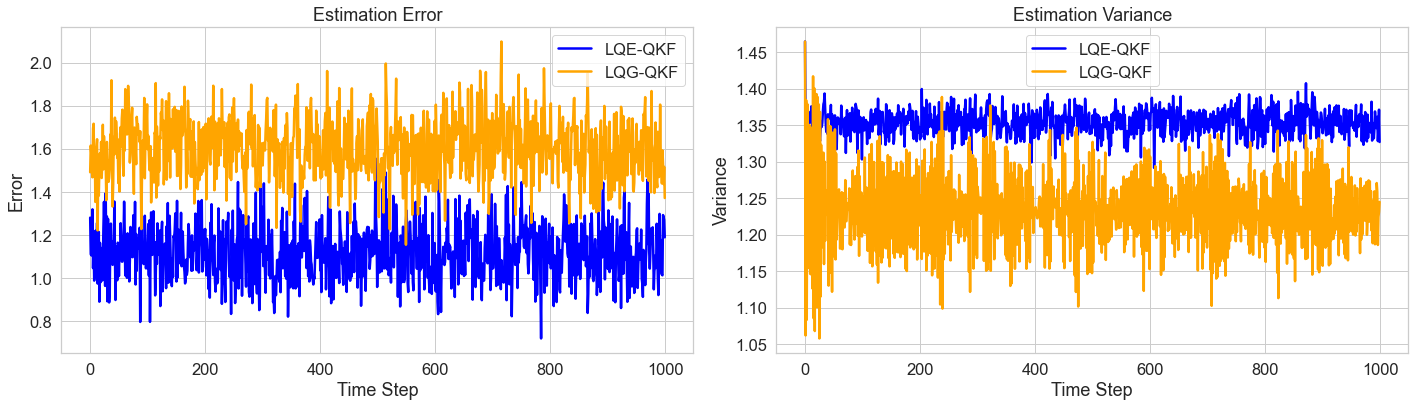

In [41]:
# plot: estimate err and covar, w/ control vs w/o control
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
sns.set_style("whitegrid")
ax[0].plot(err_list_lqe_qkf_avg, label='LQE-QKF', color='blue')
ax[0].plot(err_list_qkf_avg, label='LQG-QKF', color='orange')
# ax[0].plot(err_list_lqe_qkf_avg - err_list_qkf_avg, label='error residual', color='blue') 
ax[0].legend()
ax[0].grid(True)
ax[0].set_title('Estimation Error')
ax[0].set_xlabel('Time Step')
ax[0].set_ylabel('Error')

ax[1].plot(var_list_lqe_qkf_avg, label='LQE-QKF', color='blue')
ax[1].plot(var_list_qkf_avg, label='LQG-QKF', color='orange')
# ax[1].plot(var_list_lqe_qkf_avg - var_list_qkf_avg, label='variance residual', color='blue')
ax[1].legend()
ax[0].grid(True)
ax[1].set_title('Estimation Variance')
ax[1].set_xlabel('Time Step')
ax[1].set_ylabel('Variance')

plt.tight_layout()
plt.savefig(os.path.join(perf_dir, f'estimation_err_var-mscale={int(mscale)}.png'))
plt.show()

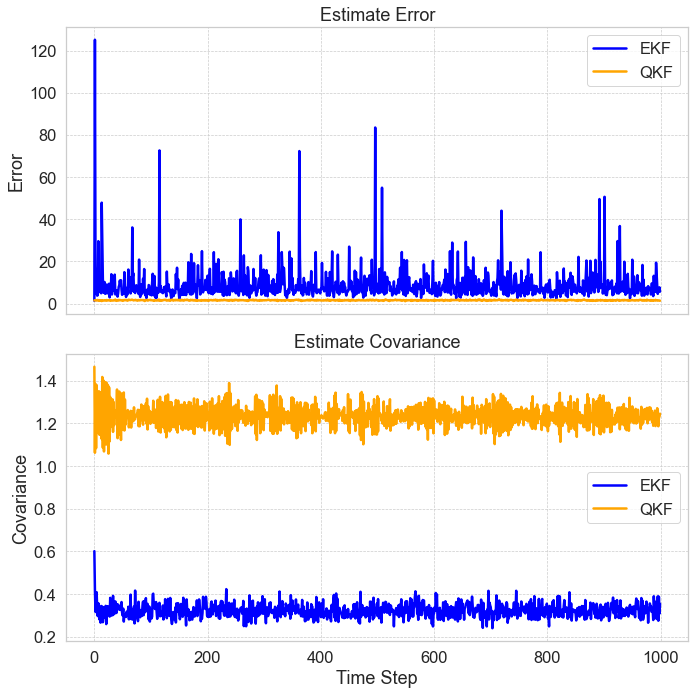

In [42]:
# plot: estimate err and covar
sns.set_theme(style="whitegrid", font_scale=1.5, rc={"lines.linewidth": 2.5})

fig, ax = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# err
sns.lineplot(x=np.arange(len(err_list_ekf_avg)), y=err_list_ekf_avg, label='EKF', color='blue', ax=ax[0])
sns.lineplot(x=np.arange(len(err_list_qkf_avg)), y=err_list_qkf_avg, label='QKF', color='orange', ax=ax[0])
ax[0].set_title('Estimate Error')
ax[0].set_ylabel('Error')
ax[0].legend()
ax[0].grid(True, which='both', linestyle='--', linewidth=0.7)

# covar
sns.lineplot(x=np.arange(len(var_list_ekf_avg)), y=var_list_ekf_avg, label='EKF', color='blue', ax=ax[1])
sns.lineplot(x=np.arange(len(var_list_qkf_avg)), y=var_list_qkf_avg, label='QKF', color='orange', ax=ax[1])
ax[1].set_title('Estimate Covariance')
ax[1].set_xlabel('Time Step')
ax[1].set_ylabel('Covariance')
ax[1].legend()
ax[1].grid(True, which='both', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.savefig(os.path.join(perf_dir, f'estimate_perf-mscale={int(mscale)}.png'), dpi=300, bbox_inches='tight')
plt.show()
plt.show()

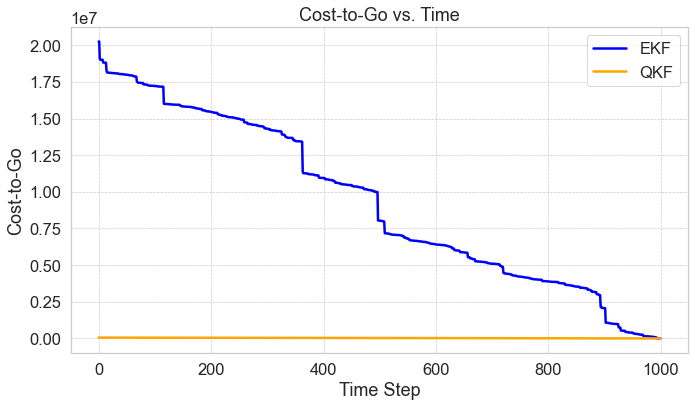

In [43]:
# plot: cost-to-go vs. time
plt.figure(figsize=(10, 6))
plt.plot(cost_list_ekf_avg, label='EKF', color='blue')
plt.plot(cost_list_qkf_avg, label='QKF', color='orange')
plt.title('Cost-to-Go vs. Time')
plt.xlabel('Time Step')
plt.ylabel('Cost-to-Go')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.savefig(os.path.join(perf_dir, f'cost_perf-mscale={int(mscale)}.png'), dpi=300, bbox_inches='tight')
plt.show()

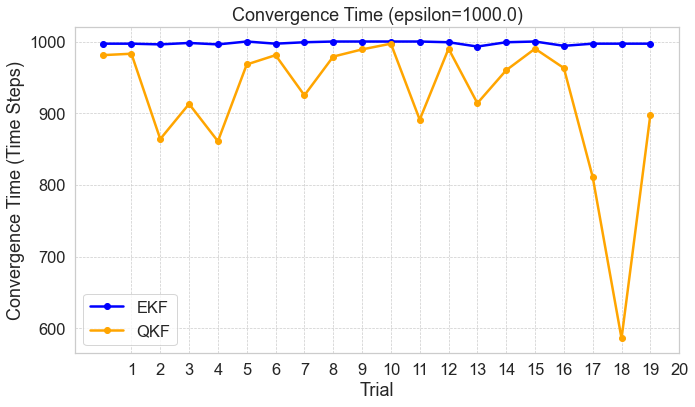

In [46]:
# plot convergence vs. trial
trials = 20
H = 1000  # horizon length
convergence_list_ekf = [H] * 20
convergence_list_qkf = [H] * 20
epsilon = 1e3
for trial in range(trials):
    initial_cost_ekf = cost_list_ekf_all[trial][0]
    for timestep in range(H):
        if cost_list_ekf_all[trial][timestep] < epsilon:
            convergence_list_ekf[trial] = timestep
            break        
    
    initial_cost_qkf = cost_list_qkf_all[trial][0]
    # print(f'initial_cost_qkf: {initial_cost_qkf}')
    for timestep in range(H):
        if cost_list_qkf_all[trial][timestep] < epsilon:
            convergence_list_qkf[trial] = timestep
            break
        
plt.figure(figsize=(10, 6))
plt.plot(convergence_list_ekf, label='EKF', color='blue', marker='o')
plt.plot(convergence_list_qkf, label='QKF', color='orange', marker='o')
plt.title(f'Convergence Time (epsilon={epsilon})')
plt.xlabel('Trial')
plt.ylabel('Convergence Time (Time Steps)')
plt.xticks(np.arange(1, trials + 1, 1))
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.savefig(os.path.join(perf_dir, f'convergence_perf-mscale={int(mscale)}.png'), dpi=300, bbox_inches='tight')
plt.show()

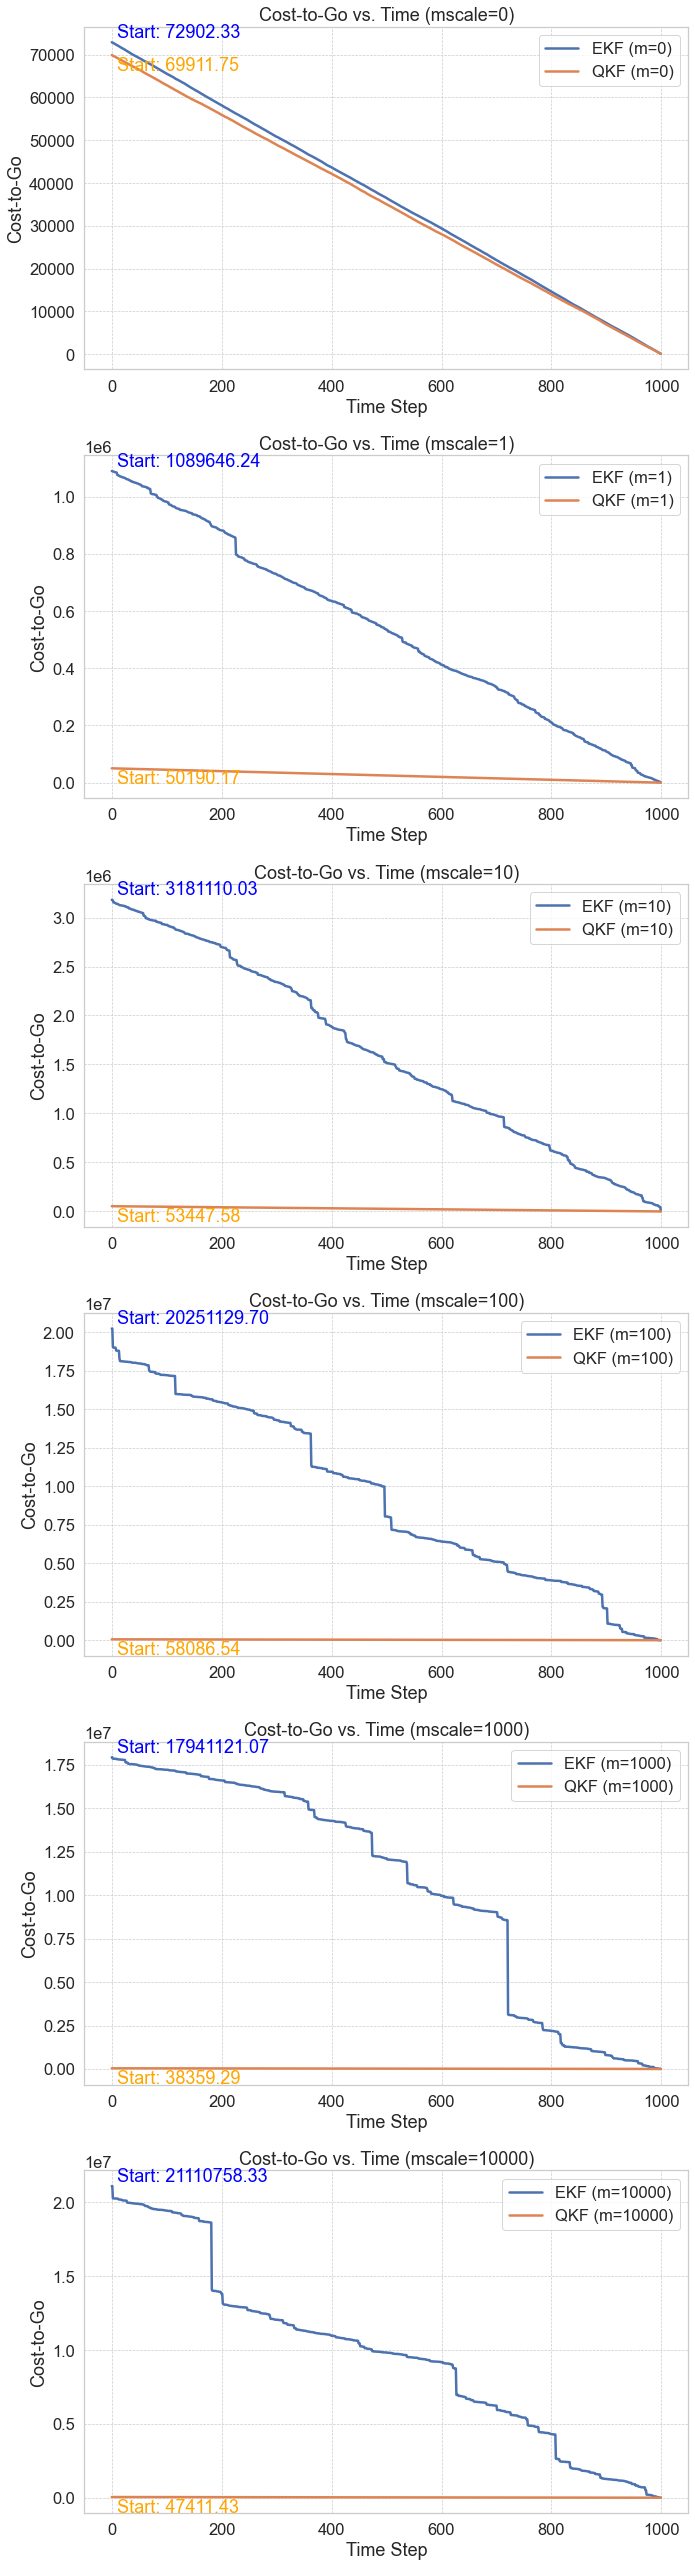

In [45]:
# plot: cost-to-go vs. non-linearity

fig, ax = plt.subplots(len(mscales), 1, figsize=(10, 6 * len(mscales)))
sns.set_theme(style="whitegrid", font_scale=1.5, rc={"lines.linewidth": 2.5})
for idx, mscale in enumerate(mscales):
    # load data
    ekf_results_all = pickle.load(open(os.path.join(pkl_dir, f'ekf_results-mscale={int(mscale)}.pkl'), 'rb'))
    qkf_results_all = pickle.load(open(os.path.join(pkl_dir, f'qkf_results-mscale={int(mscale)}.pkl'), 'rb'))

    cost_list_ekf_all = ekf_results_all[2]
    cost_list_qkf_all = qkf_results_all[2]
    
    cost_list_ekf_avg = np.mean(cost_list_ekf_all, axis=0)
    cost_list_qkf_avg = np.mean(cost_list_qkf_all, axis=0)
    
    # plot
    ax[idx].plot(cost_list_ekf_avg, label=f'EKF (m={int(mscale)})', )
    ax[idx].plot(cost_list_qkf_avg, label=f'QKF (m={int(mscale)})', )
    ax[idx].set_title(f'Cost-to-Go vs. Time (mscale={int(mscale)})')
    ax[idx].set_xlabel('Time Step')
    ax[idx].set_ylabel('Cost-to-Go')
    ax[idx].legend()
    ax[idx].grid(True, which='both', linestyle='--', linewidth=0.7)
    
    # annotate start point
    ax[idx].annotate(f'Start: {cost_list_ekf_avg[0]:.2f}', xy=(0, cost_list_ekf_avg[0]), 
                     xytext=(5, 5), textcoords='offset points', color='blue')
    ax[idx].annotate(f'Start: {cost_list_qkf_avg[0]:.2f}', xy=(0, cost_list_qkf_avg[0]),
                     xytext=(5, -15), textcoords='offset points', color='orange')

plt.tight_layout()
plt.savefig(os.path.join(perf_dir, 'cost_perf_vs_nonlinearity.png'), dpi=300, bbox_inches='tight')
plt.show()